In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_csv("ICOmod.csv",encoding='latin1')

In [3]:
data
data.columns

Index(['Crop year', 'Unnamed: 1', '1990/91', '1991/92', '1992/93', '1993/94',
       '1994/95', '1995/96', '1996/97', '1997/98', '1998/99', '1999/00',
       '2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06',
       '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       '2018/19', '2019/20'],
      dtype='object')

In [4]:
data.drop(['Unnamed: 1'], axis=1, inplace = True)
data_with_index = data.set_index("Crop year")
dataC = data_with_index.drop(['April group','July group', 'October group', 'Total'])
dataC = dataC.reset_index()
dataC

,Crop year,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,Angola,20,30,35,20,25,10,20,40,30,...,30,30,30,30,30,30,30,30,30,30
1,Bolivia (Plurinational State of),25,27,28,29,30,31,32,33,33,...,48,49,51,52,54,55,57,59,60,61
2,Brazil,"8,200","8,500","8,900","9,100","9,300","10,100","11,000","11,500","12,200",...,"19,132","19,720","20,330","20,085","20,333","20,508","21,225","21,997","22,200","22,000"
3,Burundi,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,Ecuador,350,350,350,350,350,350,300,300,300,...,150,150,150,155,155,155,155,155,155,149
5,Indonesia,"1,242","1,280","1,319","1,359","1,400","1,443","1,486","1,532","1,578",...,"3,333","3,667","3,900","4,250","4,417","4,550","4,650","4,750","4,800","4,806"
6,Madagascar,350,300,350,360,167,167,167,167,167,...,467,450,430,410,390,370,360,365,375,375
7,Malawi,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
8,Papua New Guinea,3,3,3,2,2,2,2,2,1,...,1,1,2,2,2,2,2,2,2,2
9,Paraguay,15,15,15,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [5]:
dataN = pd.melt(dataC, id_vars='Crop year', value_vars=['2015/16', '2016/17', '2017/18', '2018/19','2019/20'],var_name='year', value_name='volume')

In [6]:
dataN = dataN.rename(columns = {'Crop year' : 'Country'})

In [7]:
dataN.dropna()
dataN.tail(50)

,Country,year,volume
230,Madagascar,2019/20,375
231,Malawi,2019/20,1
232,Papua New Guinea,2019/20,2
233,Paraguay,2019/20,20
234,Peru,2019/20,250
235,Rwanda,2019/20,1
236,Timor-Leste,2019/20,0
237,Zimbabwe,2019/20,4
238,Congo,2019/20,3
239,Cuba,2019/20,216


In [8]:
dataN['volume'] = dataN["volume"].str.replace(',','')
dataN["volume"] = dataN["volume"].astype(str).astype(float)
dataN

,Country,year,volume
0,Angola,2015/16,30.0
1,Bolivia (Plurinational State of),2015/16,55.0
2,Brazil,2015/16,20508.0
3,Burundi,2015/16,2.0
4,Ecuador,2015/16,155.0
...,...,...,...
275,Uganda,2019/20,254.0
276,Venezuela,2019/20,1275.0
277,Viet Nam,2019/20,2650.0
278,Yemen,2019/20,64.0


In [15]:
dataS = dataN.sort_values(['volume','year'],ascending=False).groupby(['year','Country']).agg({'volume':max}).nlargest(25,'volume')
dataS_sorted


volume
year    Country             
2015/16 Brazil       20508.0
        Philippines   3000.0
        Indonesia     4550.0
        Ethiopia      3501.0
2016/17 Brazil       21225.0
        Indonesia     4650.0
        Philippines   3030.0
        Ethiopia      3571.0
2017/18 Ethiopia      3643.0
        Viet Nam      2500.0
        Brazil       21997.0
        Indonesia     4750.0
        Philippines   3180.0
2018/19 Viet Nam      2600.0
        Philippines   3300.0
        Brazil       22200.0
        Ethiopia      3685.0
        Indonesia     4800.0
        Mexico        2450.0
2019/20 Philippines   3250.0
        Ethiopia      3781.0
        Viet Nam      2650.0
        Indonesia     4806.0
        Brazil       22000.0
        Mexico        2425.0

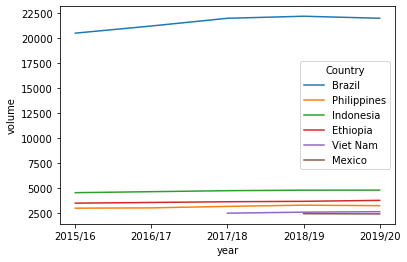

In [16]:
sns.lineplot(
    x='year',
    y='volume',
    data= dataS_sorted,
    hue = "Country"
)
plt.show()